In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import seaborn as sns
%matplotlib inline

In [151]:
# Importing the data
wine_data_df = pd.read_csv('wine_data_red.csv')
wine_data_df = pd.DataFrame(wine_data_df)
wine_data_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [152]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_data_df['quality'] = pd.cut(wine_data_df['quality'], bins = bins, labels = group_names)

In [153]:
# assigning a labels to our quality variable
label_quality = LabelEncoder()

In [154]:
# Bad is 0 and good is 1 
wine_data_df['quality'] = label_quality.fit_transform(wine_data_df['quality'])

In [155]:
wine_data_df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

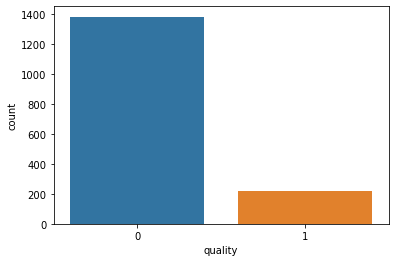

In [156]:
sns.countplot(wine_data_df['quality'])

In [172]:
# Seperating the dataset as response variable (y) and feature variabes (X)
X = wine_data_df.drop('quality', axis = 1)
y = wine_data_df['quality']

In [158]:
# Now training and testing splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [159]:
# Now apply Standard scaling to get optimized result
sc = StandardScaler()

In [160]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Random Forest Classifier

In [161]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [162]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.66      0.40      0.50        47

    accuracy                           0.88       320
   macro avg       0.78      0.68      0.72       320
weighted avg       0.87      0.88      0.87       320



In [163]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[263  10]
 [ 28  19]]


In [164]:
print(f"Training Data Score: {rfc.score(X_train, y_train)}")
print(f"Testing Data Score: {rfc.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.88125


# Support Vector Classifier

In [169]:
svc = SVC()
.fit(X_train, y_train)svc
pred_svc = svc.predict(X_test)

In [170]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [171]:
print(f"Training Data Score: {svc.score(X_train, y_train)}")
print(f"Testing Data Score: {svc.score(X_test, y_test)}")

Training Data Score: 0.8991399530883503
Testing Data Score: 0.875
